# 속성 데이터 회귀 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/car_regression.csv

--2021-12-09 11:02:29--  https://raw.githubusercontent.com/dhrim/keras_howto_2021/master/data/car_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘car_regression.csv’

car_regression.csv  100%[===================>]  57.32K  --.-KB/s    in 0.007s  

2021-12-09 11:02:29 (8.18 MB/s) - ‘car_regression.csv’ saved [58697/58697]



In [3]:
raw_data = pd.read_csv("car_regression.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [4]:
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,1.031912,-0.862911,-1.007339,-0.869534,-1.162681,-0.232460,0.548467,0.0,1.0,0.0
1,1.864711,0.309571,0.645885,-0.505815,0.044050,0.528722,1.634321,1.0,0.0,0.0
2,0.327236,-0.862911,-0.930889,-0.765614,-0.838924,0.963684,0.277004,0.0,0.0,1.0
3,0.263175,-0.862911,-0.519972,-0.401895,-0.262048,0.093761,0.277004,1.0,0.0,0.0
4,0.583482,-0.862911,-0.787546,-0.427875,-0.438643,1.471139,1.634321,1.0,0.0,0.0


In [5]:
print(train_x[:5])
print(train_y[:5])

[[-0.86291079 -1.00733903 -0.8695344  -1.16268096 -0.23246035  0.54846706
   0.          1.          0.        ]
 [ 0.30957112  0.64588517 -0.50581452  0.04404957  0.52872248  1.63432105
   1.          0.          0.        ]
 [-0.86291079 -0.93088936 -0.76561444 -0.83892399  0.96368409  0.27700357
   0.          0.          1.        ]
 [-0.86291079 -0.51997236 -0.40189456 -0.26204793  0.09376086  0.27700357
   1.          0.          0.        ]
 [-0.86291079 -0.78754622 -0.42787455 -0.43864264  1.47113931  1.63432105
   1.          0.          0.        ]]
[[1.0319121 ]
 [1.86471078]
 [0.32723628]
 [0.26317484]
 [0.58348203]]


In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 9)
(313, 1)
(79, 9)
(79, 1)


# Template
- 출력값 혹은 레이블링 값은 0.3, -1.7과 같은 숫자 값
- 입력층 노드 수는 특질 수
- 출력층 노드 수는 1개
- 출력층 활성화 함수는 없다.
- 사용하는 loss는 ‘mse’


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


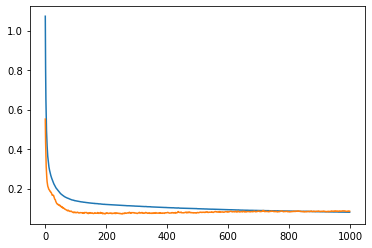

3/3 [==============================] - 0s 5ms/step - loss: 0.1515 - mae: 0.2648
loss= 0.15147528052330017
mae= 0.2648463249206543


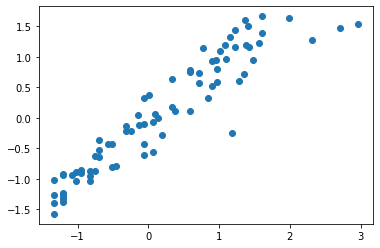

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense

model = keras.Sequential()
model.add(Input(9)) # 수정할 곳. 노드수를 입력 데이터 특질 수로 설정.
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer="SGD", loss="mse", metrics=["mae"]) # loss는 mse를 사용
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

#Template 상세

## 임포팅

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense

## 모델 정의


In [9]:
model = keras.Sequential()
model.add(Input(9)) # 수정할 곳. 노드수를 입력 데이터 특질 수로 설정.
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) 

## loss, optimizer 설정

In [10]:
model.compile(optimizer="SGD", loss="mse", metrics=["mae"]) # loss는 mse를 사용

## 모델 보기

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                100       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [12]:
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

## loss  그리기

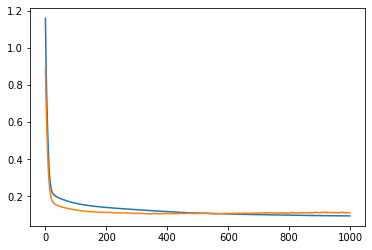

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 평가

In [14]:
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

3/3 [==============================] - 0s 4ms/step - loss: 0.1541 - mae: 0.2644
loss= 0.15408970415592194
mae= 0.2644175887107849


## 예측

In [15]:
y_ = model.predict(test_x)


## 속성 회귀 결과 그리기

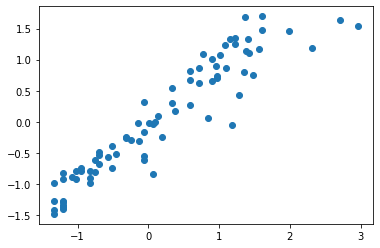

In [16]:

plt.scatter(test_y, y_)
plt.show()